# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 22

Group Members:
- Mayla Yaffa Ludmilla (13523050)
- Salman Hanif (13523056)
- Noumisyifa Nabila (13523058)
- Diyah Susan (13523080)
- Muhammad Edo (13523096)

## Deskripsi Dataset

#### A. Data Demografis & Sosial Ekonomi
| Nama Fitur                     | Deskripsi Singkat                                                                |
| ---------------------------------- | ------------------------------------------------------------------------------------ |
| Student_ID                     | Identifier unik untuk setiap mahasiswa.                                              |
| Marital status                 | Status pernikahan (lajang, menikah, bercerai, dll.).                                 |
| Application mode               | Jalur atau metode pendaftaran (seleksi nasional, jalur rekomendasi, pindahan, dll.). |
| Application order              | Urutan preferensi program studi saat mendaftar (pilihan pertama, kedua, dst.).       |
| Course                         | Program studi/jurusan yang diambil mahasiswa.                                        |
| Daytime/evening attendance     | Tipe kelas: kuliah reguler siang atau kelas malam.                                   |
| Previous qualification         | Tingkat pendidikan terakhir sebelum kuliah (SMA, Diploma, dll.).                     |
| Previous qualification (grade) | Nilai akhir/rapor/ujian dari pendidikan sebelumnya.                                  |
| Nationality                    | Kewarganegaraan mahasiswa.                                                           |
| Mother's qualification         | Tingkat pendidikan terakhir ibu.                                                     |
| Father's qualification         | Tingkat pendidikan terakhir ayah.                                                    |
| Mother's occupation            | Jenis pekerjaan ibu.                                                                 |
| Father's occupation            | Jenis pekerjaan ayah.                                                                |
| Admission grade                | Nilai/skor masuk saat seleksi penerimaan.                                            |
| Displaced                      | Apakah mahasiswa tinggal jauh dari keluarga selama kuliah.                           |
| Educational special needs      | Status memiliki kebutuhan pendidikan khusus.                                         |
| Debtor                         | Pernah memiliki tunggakan pembayaran sebelumnya.                                     |
| Tuition fees up to date        | Status pembayaran uang kuliah saat ini (lunas/menunggak).                            |
| Gender                         | Jenis kelamin mahasiswa.                                                             |
| Scholarship holder             | Mahasiswa penerima beasiswa (ya/tidak).                                              |
| Age at enrollment              | Usia saat pertama kali terdaftar di perguruan tinggi.                                |
| International                  | Status mahasiswa internasional (bukan warga setempat).                               |

#### B. Informasi Akademik Semester 1
| Fitur                                          | Deskripsi Singkat                                      |
| -------------------------------------------------- | ---------------------------------------------------------- |
| Curricular units 1st sem (credited)            | Jumlah SKS/mata kuliah semester 1 yang mendapatkan kredit. |
| Curricular units 1st sem (enrolled)            | Jumlah mata kuliah yang diambil pada semester 1.           |
| Curricular units 1st sem (evaluations)         | Jumlah evaluasi/ujian yang diikuti pada semester 1.        |
| Curricular units 1st sem (approved)            | Jumlah mata kuliah semester 1 yang lulus.                  |
| Curricular units 1st sem (grade)               | Rata-rata nilai mata kuliah semester 1.                    |
| Curricular units 1st sem (without evaluations) | Mata kuliah yang diambil tapi tidak diikuti evaluasinya.   |

#### C. Informasi Akademik Semester 2
| Nama Fitur                                     | Deskripsi Singkat                                      |
| -------------------------------------------------- | ---------------------------------------------------------- |
| Curricular units 2nd sem (credited)            | Jumlah SKS/mata kuliah semester 2 yang mendapatkan kredit. |
| Curricular units 2nd sem (enrolled)            | Jumlah mata kuliah yang diambil pada semester 2.           |
| Curricular units 2nd sem (evaluations)         | Jumlah evaluasi/ujian yang diikuti pada semester 2.        |
| Curricular units 2nd sem (approved)            | Jumlah mata kuliah semester 2 yang lulus.                  |
| Curricular units 2nd sem (grade)               | Rata-rata nilai semester 2.                                |
| Curricular units 2nd sem (without evaluations) | Mata kuliah semester 2 yang tidak diikuti evaluasinya.     |

#### D. Variabel Makro Ekonomi
| Fitur             | Deskripsi Singkat                                    |
| --------------------- | -------------------------------------------------------- |
| Unemployment rate | Tingkat pengangguran wilayah/negara pada tahun tersebut. |
| Inflation rate    | Tingkat inflasi pada periode yang sama.                  |
| GDP               | Produk Domestik Bruto; indikator pertumbuhan ekonomi.    |


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import BorderlineSMOTE 

%matplotlib inline

## Import Dataset

In [2]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [3]:
# profile = ProfileReport(df_train, title="EDA Report", explorative=True)
# profile.to_notebook_iframe()
# profile.to_file("EDA.html")

### buka EDA.html untuk melihat isi tahap EDA

In [4]:
df_train.head()

,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,3743,1,17,1,9670,1,1,118.0,1,19,...,0,6,6,6,14.000000,0,12.4,0.5,1.79,Graduate
1,3540,1,1,1,9070,1,1,139.0,1,1,...,0,6,7,6,12.166667,1,16.2,0.3,-0.92,Graduate
2,1118,1,1,1,9500,1,1,138.0,1,38,...,0,8,8,7,13.571429,0,13.9,-0.3,0.79,Graduate
3,791,1,17,1,9773,1,1,138.0,1,1,...,0,6,6,6,13.833333,0,11.1,0.6,2.02,Graduate
4,4381,1,7,1,9500,1,2,140.0,1,38,...,0,8,14,4,11.325000,1,12.7,3.7,-1.70,Dropout


C:\Users\ASUS-\AppData\Local\Temp\ipykernel_11896\912697790.py:2: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS-\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


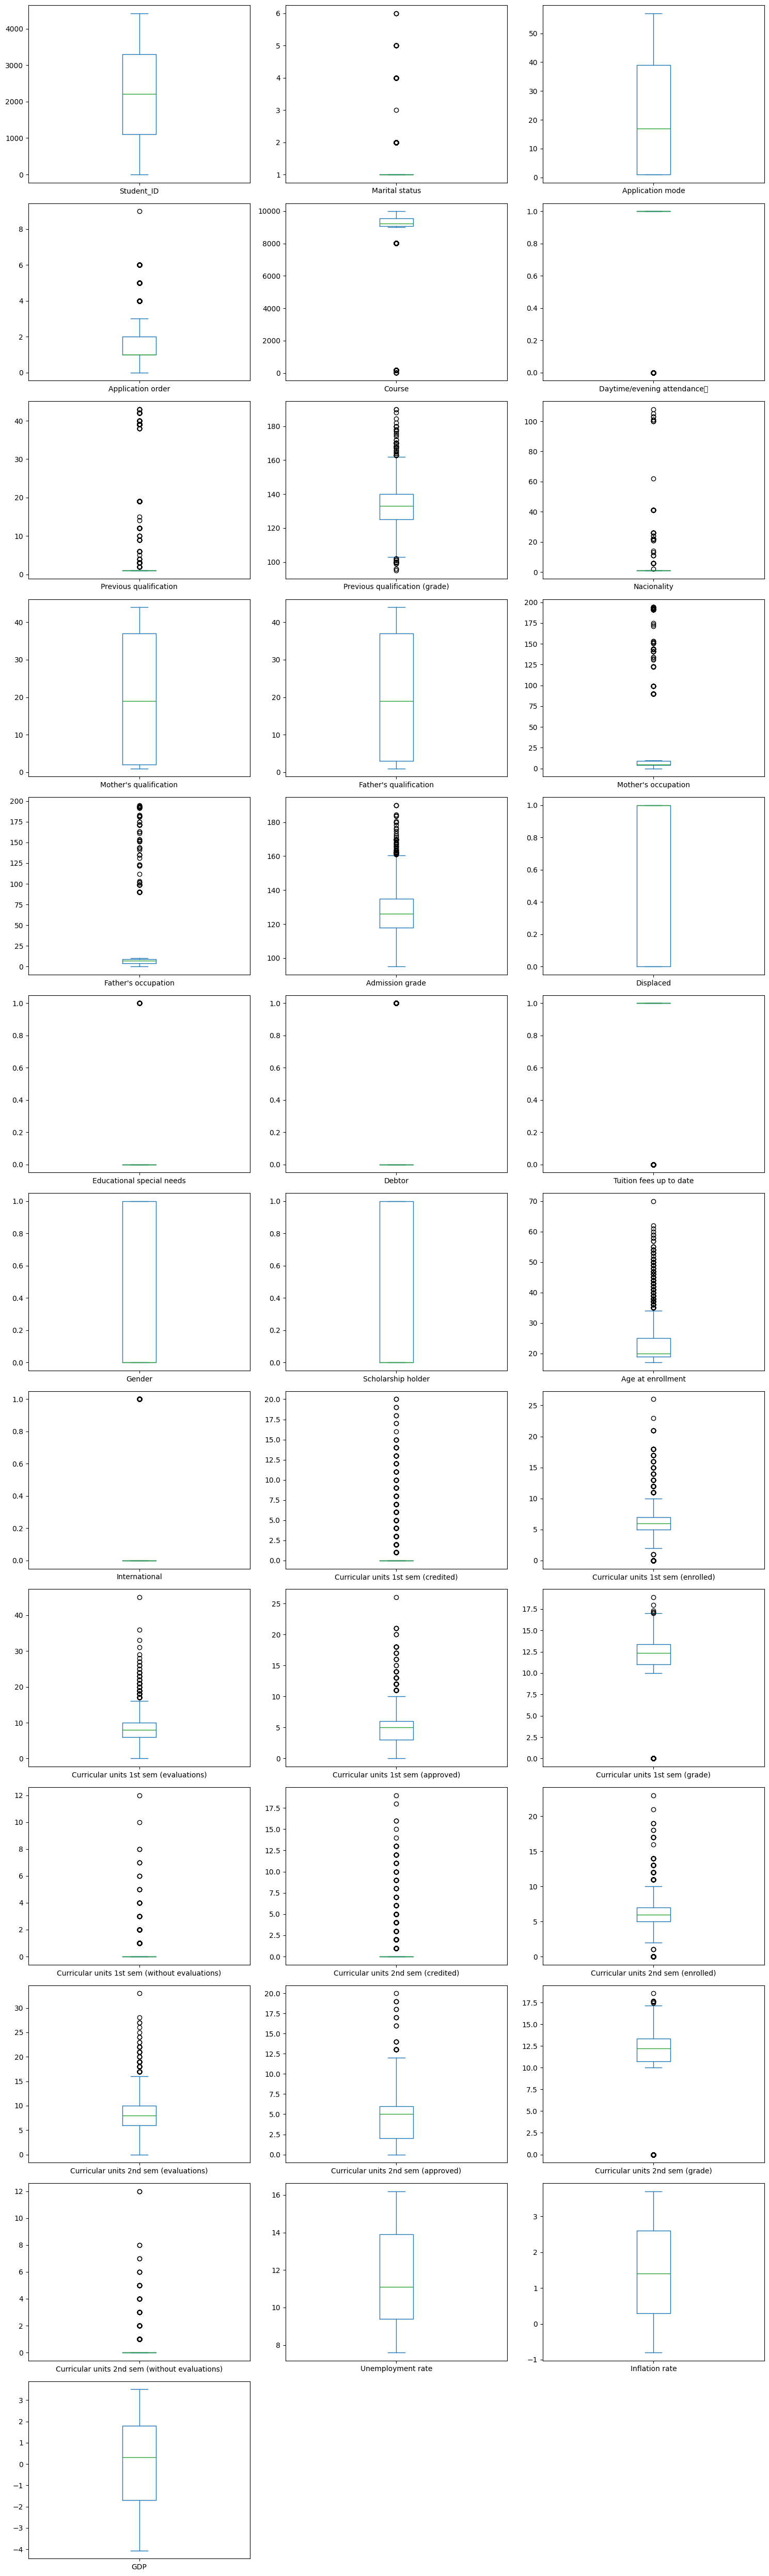

In [5]:
df_train.plot(kind='box', subplots=True, layout=(13, 3), figsize=(15, 50), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### Potensi Outlier berdasarkan EDA yang telah dilakukan

| Nama Fitur | Tipe Data | Potensi Outlier | Alasan Singkat |
| :--- | :--- | :---: | :--- |
| Student_ID | Kategorikal | Tidak | Hanya sebagai penanda unik (label/identifier). |
| Marital status | Kategorikal | Tidak | Kode untuk status sosial (nominal). |
| Application mode | Kategorikal | Tidak | Kode metode pendaftaran (nominal). |
| Application order | Ordinal | Tidak | Urutan prioritas (1-9), rentang terbatas. |
| Course | Kategorikal | Tidak | Kode jurusan/prodi (nominal). |
| Daytime/evening attendance | Binary | Tidak | Hanya nilai 0 atau 1. |
| Previous qualification | Ordinal | Tidak | Jenjang pendidikan bertingkat (SD < SMA < S1). |
| Previous qualification (grade)| Numerik | Ya | Nilai rapor bisa menyimpang jauh (range 0-200). |
| Nacionality | Kategorikal | Tidak | Kode negara (nominal). |
| Mother's qualification | Ordinal | Tidak | Jenjang pendidikan bertingkat. |
| Father's qualification | Ordinal | Tidak | Jenjang pendidikan bertingkat. |
| Mother's occupation | Kategorikal | Tidak | Jenis pekerjaan (nominal). |
| Father's occupation | Kategorikal | Tidak | Jenis pekerjaan (nominal). |
| Admission grade | Numerik | Ya | Nilai ujian masuk bersifat kontinu. |
| Displaced | Binary | Tidak | Hanya nilai 0 atau 1. |
| Educational special needs | Binary | Tidak | Hanya nilai 0 atau 1. |
| Debtor | Binary | Tidak | Hanya nilai 0 atau 1. |
| Tuition fees up to date | Binary | Tidak | Hanya nilai 0 atau 1. |
| Gender | Binary | Tidak | Hanya nilai 0 atau 1. |
| Scholarship holder | Binary | Tidak | Hanya nilai 0 atau 1. |
| Age at enrollment | Numerik | Ya | Ada kemungkinan mahasiswa usia lanjut (misal 50+). |
| International | Binary | Tidak | Hanya nilai 0 atau 1. |
| Curricular units 1st sem (credited) | Numerik | Ya | SKS bisa 0 atau sangat banyak (overload). |
| Curricular units 1st sem (enrolled) | Numerik | Ya | Jumlah mata kuliah yang diambil (diskrit). |
| Curricular units 1st sem (evaluations)| Numerik | Ya | Jumlah ujian bisa menyimpang jauh dari rata-rata. |
| Curricular units 1st sem (approved) | Numerik | Ya | Jumlah kelulusan mata kuliah. |
| Curricular units 1st sem (grade) | Numerik | Ya | Rata-rata nilai (IPK semester). |
| Curricular units 1st sem (without evals)| Numerik | Ya | Jumlah mata kuliah tanpa ujian. |
| Curricular units 2nd sem (credited) | Numerik | Ya | Pola sama dengan semester 1. |
| Curricular units 2nd sem (enrolled) | Numerik | Ya | Pola sama dengan semester 1. |
| Curricular units 2nd sem (evaluations)| Numerik | Ya | Pola sama dengan semester 1. |
| Curricular units 2nd sem (approved) | Numerik | Ya | Pola sama dengan semester 1. |
| Curricular units 2nd sem (grade) | Numerik | Ya | Pola sama dengan semester 1. |
| Curricular units 2nd sem (without evals)| Numerik | Ya | Pola sama dengan semester 1. |
| Unemployment rate | Numerik | Ya | Data ekonomi makro yang fluktuatif. |
| Inflation rate | Numerik | Ya | Inflasi bisa melonjak tinggi (ekstrim). |
| GDP | Numerik | Ya | Pertumbuhan ekonomi bisa negatif/positif ekstrim. |
| Target | Kategorikal | Tidak | Label kelas target (output). |

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to avoid data leakage inbetween the sets. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [6]:
# We gonna use K-fold cross validation (split the data later)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is seldom ready for training, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to at least implement one method for each process. For each step that you will do, please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.

## A. Data Cleaning

Data cleaning is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. Handling Missing Data: Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. Dealing with Outliers: Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. Data Validation: Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. Removing Duplicates: Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. Feature Engineering: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. Data Imputation:

    a. Mean, Median, or Mode Imputation: For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. Constant Value Imputation: You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. Imputation Using Predictive Models: More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. Deletion of Missing Data:

    a. Listwise Deletion: In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. Column (Feature) Deletion: If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. Domain-Specific Strategies:

    a. Domain Knowledge: In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. Imputation Libraries:

    a. Scikit-Learn: Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. Fancyimpute: Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [7]:
# Write your code here
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Student_ID                                      3096 non-null   int64  
 1   Marital status                                  3096 non-null   int64  
 2   Application mode                                3096 non-null   int64  
 3   Application order                               3096 non-null   int64  
 4   Course                                          3096 non-null   int64  
 5   Daytime/evening attendance	                     3096 non-null   int64  
 6   Previous qualification                          3096 non-null   int64  
 7   Previous qualification (grade)                  3096 non-null   float64
 8   Nacionality                                     3096 non-null   int64  
 9   Mother's qualification                   

Tidak ada missing value pada dataset yang diberikan sehingga tahap handling missing value ini bisa langsung dianggap selesai

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. Imputation: Replace with mean, median, or a boundary value.
2. Clipping: Cap values to upper and lower limits.
3. Transformation: Use log, square root, or power transformations to reduce their influence.
4. Model-Based: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [8]:
grade_columns = ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

for col in grade_columns:
    jumlah_error = (df_train[col] > 200).sum()
    print(f"{col}: {jumlah_error} row")

Previous qualification (grade): 0 row
Admission grade: 0 row
Curricular units 1st sem (grade): 0 row
Curricular units 2nd sem (grade): 0 row


Dilihat dari distribusi nilainya, grade (kemungkinan hasil normalisasi) memiliki rentang nilai di 0-200, sehingga yang nilainya di luar rentang itu dapat dianggap outlier.
Data menunjukkan 0 row yang memilikinya, sehingga sudah aman dari outlier

In [9]:
# Approved tidak boleh lebih besar dari Enrolled (Tidak mungkin jumlah matkul lulus lebih dari jumlah matkul diambil)
error1_sem1 = df_train[df_train['Curricular units 1st sem (approved)'] > df_train['Curricular units 1st sem (enrolled)']]
error1_sem2 = df_train[df_train['Curricular units 2nd sem (approved)'] > df_train['Curricular units 2nd sem (enrolled)']]
print(f"Approved > Enrolled (Sem 1): {len(error1_sem1)} row")
print(f"Approved > Enrolled (Sem 2): {len(error1_sem2)} row")

# Enrolled 0, tapi Evaluations > 0 atau Approved > 0
error2_sem1 = df_train[(df_train['Curricular units 1st sem (enrolled)'] == 0) & ((df_train['Curricular units 1st sem (evaluations)'] > 0) | (df_train['Curricular units 1st sem (approved)'] > 0))]
error2_sem2 = df_train[(df_train['Curricular units 2nd sem (enrolled)'] == 0) & ((df_train['Curricular units 2nd sem (evaluations)'] > 0) | (df_train['Curricular units 2nd sem (approved)'] > 0))]
print(f"Ghost Student (Sem 1): {len(error2_sem1)} row")
print(f"Ghost Student (Sem 2): {len(error2_sem2)} row")

# Approved > 0, tapi Evaluations = 0
error3_sem1 = df_train[(df_train['Curricular units 1st sem (approved)'] > 0) & (df_train['Curricular units 1st sem (evaluations)'] == 0)]
error3_sem2 = df_train[(df_train['Curricular units 2nd sem (approved)'] > 0) & (df_train['Curricular units 2nd sem (evaluations)'] == 0)]
print(f"Lulus tanpa ikut evaluasi (Sem 1): {len(error3_sem1)} row")
print(f"Lulus tanpa ikut evaluasi (Sem 2): {len(error3_sem2)} row")

Approved > Enrolled (Sem 1): 0 row
Approved > Enrolled (Sem 2): 0 row
Ghost Student (Sem 1): 0 row
Ghost Student (Sem 2): 0 row
Lulus tanpa ikut evaluasi (Sem 1): 0 row
Lulus tanpa ikut evaluasi (Sem 2): 0 row


Data secara pengambilan mata kuliah oleh mahasiswa sudah aman dari anomali, tidak perlu ada data yang dihapus

TODO : Mengecek data outlier lain. Data seperti Age at enrollment yang memang di luar rentang umum seperti 70 harusnya tidak dianggap sebagai outlier karena masih logis (univ terbuka banyak paruh baya kuliah)

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [10]:
# Mengecek jumlah baris yang duplikat
jumlah_duplikat = df_train.duplicated().sum()
print(f"Total baris duplikat: {jumlah_duplikat}")

Total baris duplikat: 0


Tidak ada baris duplikat di data sehingga step ini dianggap selesai

### IV. Feature Engineering

Feature engineering involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. Feature Selection: Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. Creating New Features: Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - Polynomial Features: Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - Interaction Features: Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. Binning or Discretization: Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. Domain-Specific Feature Engineering: Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

Jumlah mata kuliah yang tidak lulus pada semester 1 dan 2

In [11]:
df_train['Curricular units 1st sem (not approved)'] =  df_train['Curricular units 1st sem (enrolled)'] - df_train['Curricular units 1st sem (approved)']
df_train['Curricular units 2nd sem (not approved)'] =  df_train['Curricular units 2nd sem (enrolled)'] - df_train['Curricular units 2nd sem (approved)']

Persentase matkul yang lulus dari yang di enrolled

In [12]:
# Approval Rates (Rasio Kelulusan)
df_train['Approval_Rate_S1'] = df_train['Curricular units 1st sem (approved)'] / (df_train['Curricular units 1st sem (enrolled)'] + 1e-9)
df_train['Approval_Rate_S2'] = df_train['Curricular units 2nd sem (approved)'] / (df_train['Curricular units 2nd sem (enrolled)'] + 1e-9)
df_train['Approval_Rate_Mean'] = (df_train['Approval_Rate_S1'] + df_train['Approval_Rate_S2']) / 2

Indikasi seberapa sering mengikuti ujian, jika lebih dari 1 (evaluation > enrolled) artinya mengikuti remedial

In [13]:
df_train['Evaluation_percentage 1st sem'] = df_train['Curricular units 1st sem (evaluations)'] / df_train['Curricular units 1st sem (enrolled)'].replace(0, 1)
df_train['Evaluation_percentage 2nd sem'] = df_train['Curricular units 2nd sem (evaluations)'] / df_train['Curricular units 2nd sem (enrolled)'].replace(0, 1)

Perubahan nilai dari semester 1 ke 2, apakah meningkat (positif) atau menurun (negatif)

In [14]:
df_train['Grade_Mean'] = (df_train['Curricular units 1st sem (grade)'] + df_train['Curricular units 2nd sem (grade)']) / 2
df_train['Grade_Change'] = df_train['Curricular units 2nd sem (grade)'] - df_train['Curricular units 1st sem (grade)']

Jika 1 artinya rentan, biaya nunggak dan tidak punya beasiswa. Jika 0 dianggap aman

In [15]:
df_train['Financial_Vulnerability'] = df_train['Debtor'] & (df_train['Scholarship holder'] == 0)

# Financial Pressure Score (Bobot: Hutang=3, SPP Nunggak=4, Beasiswa=-2)
df_train['Financial_Risk'] = ((~df_train['Scholarship holder'].astype(bool)).astype(int) * 2 + 
                        df_train['Debtor'] * 3 + 
                        (~df_train['Tuition fees up to date'].astype(bool)).astype(int) * 4)

# Prestasi x Ekonomi
df_train['Fin_Performance'] = df_train['Financial_Risk'] * (1 - df_train['Approval_Rate_Mean'])

Pengklasifikasian usia saat enrolled (remaja, dewasa awal, dewasa, lanjut usia)

In [16]:
bins = [0, 19, 25, 35, 100]
labels = ['Remaja (<20)', 'Dewasa Awal (20-25)', 'Dewasa (25-35)', 'Tua Bangka (>35)']

# Binning (pd.cut)
# 'right=True' artinya batas kanan termasuk (<=), kelompok pertama adalah usia <= 19, dst
df_train['Age_group'] = pd.cut(df_train['Age at enrollment'], bins=bins, labels=labels, right=True)

# Pastikan tidak ada kelompok yang terlalu sedikit atau kosong
print("Distribusi Kelompok Usia Baru:")
print(df_train['Age_group'].value_counts().sort_index())

# Label Encoding karena usia memiliki urutan (Ordinal)
age_mapping = {label: idx for idx, label in enumerate(labels)}
df_train['Age_group_encoded'] = df_train['Age_group'].map(age_mapping)

Distribusi Kelompok Usia Baru:
Age_group
Remaja (<20)           1397
Dewasa Awal (20-25)     980
Dewasa (25-35)          445
Tua Bangka (>35)        274
Name: count, dtype: int64


#### Pengecekan Feature baru

In [17]:
new_feature = ['Curricular units 1st sem (not approved)', 'Curricular units 2nd sem (not approved)',
                'Approval_Rate_S1', 'Approval_Rate_S2', 'Approval_Rate_Mean',
                'Evaluation_percentage 1st sem', 'Evaluation_percentage 2nd sem',
                'Grade_Change', 'Financial_Vulnerability', 'Fin_Performance', 'Financial_Risk', 'Grade_Mean'
                ]
print(df_train[new_feature].head())

   Curricular units 1st sem (not approved)  \
0                                        1   
1                                        0   
2                                        1   
3                                        0   
4                                        4   

   Curricular units 2nd sem (not approved)  Approval_Rate_S1  \
0                                        0          0.833333   
1                                        0          1.000000   
2                                        1          0.857143   
3                                        0          1.000000   
4                                        4          0.500000   

   Approval_Rate_S2  Approval_Rate_Mean  Evaluation_percentage 1st sem  \
0             1.000            0.916667                       1.500000   
1             1.000            1.000000                       1.166667   
2             0.875            0.866071                       1.285714   
3             1.000            1.000000   

In [18]:
mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_train['Target_Encoded'] = df_train['Target'].map(mapping)

new_feature = new_feature + ['Target_Encoded']
corr_target = df_train[new_feature].corr()['Target_Encoded'].sort_values(ascending=False)

print(corr_target)

Target_Encoded                             1.000000
Approval_Rate_S2                           0.697438
Approval_Rate_Mean                         0.682071
Approval_Rate_S1                           0.619669
Grade_Mean                                 0.550038
Grade_Change                               0.211369
Evaluation_percentage 2nd sem             -0.009020
Evaluation_percentage 1st sem             -0.062100
Financial_Vulnerability                   -0.267542
Financial_Risk                            -0.473635
Fin_Performance                           -0.575718
Curricular units 1st sem (not approved)   -0.633470
Curricular units 2nd sem (not approved)   -0.702454
Name: Target_Encoded, dtype: float64


Feature Selection berdasarkan Korelasi dengan kolom target

In [19]:
corr_target = df_train.drop(columns=['Target', 'Age_group']).corr()['Target_Encoded'].sort_values(ascending=False)
print(corr_target)

Target_Encoded                                    1.000000
Approval_Rate_S2                                  0.697438
Approval_Rate_Mean                                0.682071
Approval_Rate_S1                                  0.619669
Curricular units 2nd sem (approved)               0.616193
Curricular units 2nd sem (grade)                  0.566723
Grade_Mean                                        0.550038
Curricular units 1st sem (approved)               0.516436
Curricular units 1st sem (grade)                  0.484860
Tuition fees up to date                           0.412867
Scholarship holder                                0.302675
Grade_Change                                      0.211369
Curricular units 2nd sem (enrolled)               0.159829
Curricular units 1st sem (enrolled)               0.137918
Admission grade                                   0.120171
Displaced                                         0.112011
Previous qualification (grade)                    0.1095

In [20]:
pd.set_option('display.max_columns', None)
display(df_train.head())

,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Curricular units 1st sem (not approved),Curricular units 2nd sem (not approved),Approval_Rate_S1,Approval_Rate_S2,Approval_Rate_Mean,Evaluation_percentage 1st sem,Evaluation_percentage 2nd sem,Grade_Mean,Grade_Change,Financial_Vulnerability,Financial_Risk,Fin_Performance,Age_group,Age_group_encoded,Target_Encoded
0,3743,1,17,1,9670,1,1,118.0,1,19,38,7,9,113.5,1,0,0,1,0,1,19,0,0,6,9,5,13.500000,0,0,6,6,6,14.000000,0,12.4,0.5,1.79,Graduate,1,0,0.833333,1.000,0.916667,1.500000,1.000000,13.750000,0.500000,False,0,0.000000e+00,Remaja (<20),0,2
1,3540,1,1,1,9070,1,1,139.0,1,1,19,3,9,134.9,1,0,0,1,1,0,20,0,0,6,7,6,13.666667,0,0,6,7,6,12.166667,1,16.2,0.3,-0.92,Graduate,0,0,1.000000,1.000,1.000000,1.166667,1.166667,12.916667,-1.500000,False,2,3.333334e-10,Dewasa Awal (20-25),1,2
2,1118,1,1,1,9500,1,1,138.0,1,38,19,9,5,144.3,0,0,0,1,0,0,20,0,0,7,9,6,12.700000,0,0,8,8,7,13.571429,0,13.9,-0.3,0.79,Graduate,1,1,0.857143,0.875,0.866071,1.285714,1.000000,13.135714,0.871429,False,2,2.678571e-01,Dewasa Awal (20-25),1,2
3,791,1,17,1,9773,1,1,138.0,1,1,19,9,9,124.0,0,0,0,1,0,1,19,0,0,6,6,6,13.166667,0,0,6,6,6,13.833333,0,11.1,0.6,2.02,Graduate,0,0,1.000000,1.000,1.000000,1.000000,1.000000,13.500000,0.666667,False,0,0.000000e+00,Remaja (<20),0,2
4,4381,1,7,1,9500,1,2,140.0,1,38,37,7,8,140.0,0,0,0,1,0,0,29,0,0,8,14,4,11.325000,1,0,8,14,4,11.325000,1,12.7,3.7,-1.70,Dropout,4,4,0.500000,0.500,0.500000,1.750000,1.750000,11.325000,0.000000,False,2,1.000000e+00,Dewasa (25-35),2,0


#### Feature Selection

ID sudah sepatutnya dihapus karena akan mengganggu data dengan menjadi cell unik, feature tak terpakai dihapus, serta target dihapus karena akan dipindah ke variabel y.

Kolom yang redundan secara logis akan di-drop juga 
1. 'not approved' dibuang karena sudah diwakili oleh 'Approval_percentage' dan 'Approved'
2. 'Age at enrollment' dibuang karena 'Age_Group_Encoded' korelasinya lebih tinggi (-0.28 vs -0.24)

serta kolom yang memiliki korelasi rendah dengan feature target untuk menghindari overfitting (Threshold Korelasi < 0.02)

Walau demikian, nilai korelasi yang didapat dengan .corr() adalah hubungan linear, sehingga bisa saja data berkorelasi secara eksponensial tetapi mendapat nilai korelasi rendah pada peninjauan di atas.

In [21]:
# Feature yang akan di-drop

# Kolom Target (akan dijadikan y) dan ID & Age Group (Tak Terpakai)
cols_technical = ['Student_ID', 'Target', 'Target_Encoded', 'Age_group']

# Kolom Redundan 
cols_redundant = [ 'Curricular units 1st sem (not approved)',  'Curricular units 2nd sem (not approved)', 'Age at enrollment']

# Kolom Korelasi Sangat Lemah
cols_low_corr = [
    'Educational special needs',     
    'Nacionality',            
    'Unemployment rate',        
    'International'
]

# Penggabungan semua kolom yang akan didrop
cols_to_drop = list(set(cols_technical + cols_redundant + cols_low_corr))

print(f"Total fitur yang akan dibuang: {len(cols_to_drop)}")
print("Daftar:", cols_to_drop)

X = df_train.drop(columns=cols_to_drop, errors='ignore')
y = df_train['Target_Encoded']

# mapping = {0 : 'Dropout', 1 : 'Enrolled', 2 : 'Graduate'}
# y = df_train['Target_Encoded'].map(mapping)

print(f"\nDimensi awal: {df_train.shape}")
print(f"Dimensi setelah seleksi: {X.shape}")

X.info()

Total fitur yang akan dibuang: 11
Daftar: ['Target', 'Age_group', 'Target_Encoded', 'Curricular units 2nd sem (not approved)', 'Nacionality', 'International', 'Educational special needs', 'Student_ID', 'Unemployment rate', 'Curricular units 1st sem (not approved)', 'Age at enrollment']

Dimensi awal: (3096, 53)
Dimensi setelah seleksi: (3096, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 42 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  3096 non-null   int64   
 1   Application mode                                3096 non-null   int64   
 2   Application order                               3096 non-null   int64   
 3   Course                                          3096 non-null   int64   
 4   Daytime/evening attendance	                     3096 non-null   int64  

## B. Data Preprocessing

Data preprocessing is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. Feature Scaling: Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. Encoding Categorical Variables: Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. Handling Imbalanced Classes: If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. Dimensionality Reduction: Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. Normalization: Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

Feature scaling is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. Algorithm Sensitivity: Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. Distance-Based Algorithms: Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. Regularization: Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. Min-Max Scaling (Normalization): This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. Standardization (Z-score Scaling): This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. Robust Scaling: Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. Log Transformation: In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, some algorithms may not require feature scaling, particularly tree-based models.

#### Reduce Cardinality

In [22]:
def reduce_cardinality(df_train, df_test, col, top_k=30):
    top = df_train[col].value_counts().nlargest(top_k).index
    df_train[col] = df_train[col].apply(lambda x: str(x) if x in top else 'Other')
    df_test[col] = df_test[col].apply(lambda x: str(x) if x in top else 'Other')
    return df_train, df_test

target_cats = ['Course', 'Application mode', "Mother's occupation", "Father's occupation"]

for col in target_cats:
    X, df_test = reduce_cardinality(X, df_test, col, top_k=30)

Dilakukan Standar Scaler

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Kolom yang perlu di-scale hanya numerik kontinu (float dan int)
cols_to_scale = [
    # --- Fitur Asli ---
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 1st sem (approved)', 
    'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 2nd sem (evaluations)', 
    'Inflation rate', 
    'GDP',
    
    # --- Fitur Baru (Feature Engineering) ---
    'Approval_Rate_S1', 
    'Approval_Rate_S2',
    'Approval_Rate_Mean',
    'Evaluation_percentage 1st sem', 
    'Evaluation_percentage 2nd sem',
    'Grade_Mean',
    'Grade_Change',
    'Financial_Risk',   
    'Fin_Performance'
]

for col in cols_to_scale:
    X[col] = pd.to_numeric(X[col], errors='coerce')

cols_categorical = [col for col in X.columns if col not in cols_to_scale]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_to_scale),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cols_categorical)
    ],
    verbose_feature_names_out=False
)

X_scaled_array = preprocessor.fit_transform(X)

feature_names = preprocessor.get_feature_names_out()
X_scaled_df = pd.DataFrame(X_scaled_array, columns=feature_names)

print("Tipe data sekarang:")
print(X_scaled_df.dtypes.unique())
print(X_scaled_df.head())

Tipe data sekarang:
[dtype('float64')]
   Previous qualification (grade)  Admission grade  \
0                       -1.123830        -0.927934   
1                        0.474852         0.552257   
2                        0.398724         1.202434   
3                        0.398724        -0.201672   
4                        0.550979         0.905013   

   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0                          0.589849                          0.726311   
1                          0.624003                          0.377753   
2                          0.425909                          0.644830   
3                          0.521540                          0.694624   
4                          0.144138                          0.217734   

   Curricular units 1st sem (enrolled)  Curricular units 2nd sem (enrolled)  \
0                            -0.098285                            -0.090515   
1                            -0.098285 

In [24]:
X_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Columns: 288 entries, Previous qualification (grade) to Age_group_encoded_3
dtypes: float64(288)
memory usage: 6.8 MB


### II. Feature Encoding

Feature encoding, also known as categorical encoding, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. Nominal Data: Categories with no intrinsic order, like colors or country names.  

2. Ordinal Data: Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. Label Encoding:

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. One-Hot Encoding:

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. Target Encoding (Mean Encoding):

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

#### Karena Kebutuhan untuk Proses Feature Selection, Encoding sudah dilakukan bersamaan dengan Feature Engineering

### III. Handling Imbalanced Dataset

Handling imbalanced datasets is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. Biased Model Performance:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. Misleading Accuracy:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. Poor Generalization:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. Resampling Methods:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. Evaluation Metrics:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. Algorithmic Approaches:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [25]:
print(y.value_counts(normalize=True) * 100)

Target_Encoded
2    49.935401
0    32.105943
1    17.958656
Name: proportion, dtype: float64


Percobaan resampling untuk (harapannya) meningkatkan akurasi dan mengurangi volume data yang besar

In [26]:
# X_resampled.head()

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5) 
X_scaled_df, y = smote.fit_resample(X_scaled_df, y)

print("Resampled shapes:", X_scaled_df.shape, y.shape)

Resampled shapes: (4638, 288) (4638,)


### IV. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. Principal Component Analysis (PCA): Converts correlated features into a smaller number of uncorrelated "principal components."
2. t-SNE (t-Distributed Stochastic Neighbor Embedding): A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. Autoencoders: Neural networks that learn compressed representations of the data.

In [28]:
# Cek variansi tiap kolom, urutkan dari yang terbesar
variances = X_scaled_df.var().sort_values(ascending=False)

print("--- Top 5 Kolom dengan Variansi Terbesar ---")
print(variances.head(10))

print("\n--- Top 5 Kolom dengan Variansi Terkecil ---")
print(variances.tail(5))

--- Top 5 Kolom dengan Variansi Terbesar ---
Evaluation_percentage 2nd sem             1.073065
Evaluation_percentage 1st sem             1.066027
Grade_Change                              1.053370
Curricular units 2nd sem (evaluations)    1.005460
Fin_Performance                           0.997705
Curricular units 1st sem (grade)          0.993290
Curricular units 2nd sem (grade)          0.987985
Grade_Mean                                0.984805
Approval_Rate_S1                          0.977444
Curricular units 1st sem (evaluations)    0.964057
dtype: float64

--- Top 5 Kolom dengan Variansi Terkecil ---
Application order_0                                  0.000216
Curricular units 1st sem (credited)_16               0.000216
Marital status_3                                     0.000216
Curricular units 1st sem (without evaluations)_12    0.000216
Curricular units 2nd sem (credited)_15               0.000216
dtype: float64


In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_pca_array = pca.fit_transform(X_scaled_df)

# Ubah kembali menjadi DataFrame
pc_columns = [f'PC{i+1}' for i in range(X_pca_array.shape[1])]
X_pca_df = pd.DataFrame(data=X_pca_array, columns=pc_columns)

print(f"Dimensi Sebelum PCA: {X_scaled_df.shape}")
print(f"Dimensi Setelah PCA: {X_pca_df.shape}")
print(X_pca_df.head())

Dimensi Sebelum PCA: (4638, 288)
Dimensi Setelah PCA: (4638, 54)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.779150 -1.404692 -0.640115 -1.658940  0.577857 -0.331255 -0.538894   
1  1.618328 -1.314668 -0.115053  0.758282  0.269496 -0.598281  0.150907   
2  1.900263 -0.962397  0.827099  0.996138  0.241953  0.199133 -0.886194   
3  1.778640 -2.280319 -0.065786 -0.165356  0.537117 -0.214929 -0.486714   
4  1.005892  1.929159  0.339969  1.015377 -2.059951  1.061377  0.860210   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.255093  0.139833 -0.951528  0.772662  0.068080 -0.096522  0.612888   
1 -0.665600 -0.026203  1.179196  0.182115  0.700332 -0.512437  0.224833   
2 -0.556963 -0.351212  0.008374  0.241690 -0.138407  0.189481  0.566900   
3  0.197368 -0.616304 -0.505119  0.101430 -0.852428 -0.599720  0.777764   
4  0.896875 -0.044897 -0.441876 -0.030686 -0.429000  0.614831 -0.301006   

       PC15      PC16      PC17  

In [30]:
X_final = X_pca_df
y_final = y

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [31]:
from sklearn.preprocessing import PowerTransformer

def preprocess_pipeline(df, scaler=None, is_training=True):
    df_proc = df.copy()

    y_final = None
    if 'Target' in df_proc.columns:
        mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
        y_final = df_proc['Target'].map(mapping)

    df_proc['Curricular units 1st sem (not approved)'] = df_proc['Curricular units 1st sem (enrolled)'] - df_proc['Curricular units 1st sem (approved)']
    df_proc['Curricular units 2nd sem (not approved)'] = df_proc['Curricular units 2nd sem (enrolled)'] - df_proc['Curricular units 2nd sem (approved)']

    df_proc['Approval_Rate_S1'] = df_proc['Curricular units 1st sem (approved)'] / (df_proc['Curricular units 1st sem (enrolled)'] + 1e-9)
    df_proc['Approval_Rate_S2'] = df_proc['Curricular units 2nd sem (approved)'] / (df_proc['Curricular units 2nd sem (enrolled)'] + 1e-9)
    df_proc['Approval_Rate_Mean'] = (df_proc['Approval_Rate_S1'] + df_proc['Approval_Rate_S2']) / 2

    df_proc['Evaluation_percentage 1st sem'] = df_proc['Curricular units 1st sem (evaluations)'] / df_proc['Curricular units 1st sem (enrolled)'].replace(0, 1)
    df_proc['Evaluation_percentage 2nd sem'] = df_proc['Curricular units 2nd sem (evaluations)'] / df_proc['Curricular units 2nd sem (enrolled)'].replace(0, 1)

    df_proc['Grade_Mean'] = (df_proc['Curricular units 1st sem (grade)'] + df_proc['Curricular units 2nd sem (grade)']) / 2
    df_proc['Grade_Change'] = df_proc['Curricular units 2nd sem (grade)'] - df_proc['Curricular units 1st sem (grade)']

    if 'Debtor' in df_proc.columns and 'Scholarship holder' in df_proc.columns:
        df_proc['Financial_Vulnerability'] = (df_proc['Debtor'] == 1) & (df_proc['Scholarship holder'] == 0)
        df_proc['Financial_Vulnerability'] = df_proc['Financial_Vulnerability'].astype(int)

    if 'Debtor' in df_proc.columns and 'Tuition fees up to date' in df_proc.columns:
         df_proc['Financial_Risk'] = ((~df_proc['Scholarship holder'].astype(bool)).astype(int) * 2 +
                        df_proc['Debtor'] * 3 +
                        (~df_proc['Tuition fees up to date'].astype(bool)).astype(int) * 4)

    if 'Financial_Risk' in df_proc.columns:
        df_proc['Fin_Performance'] = df_proc['Financial_Risk'] * (1 - df_proc['Approval_Rate_Mean'])

    bins = [0, 19, 25, 35, 100]
    labels = [0, 1, 2, 3]
    df_proc['Age_group_encoded'] = pd.cut(df_proc['Age at enrollment'], bins=bins, labels=labels, right=True).astype(int)

    cols_to_drop = [
        'Student_ID', 'Target', 'Target_Encoded', 'Age_group', 'Age at enrollment' ] #'Educational special needs'

    X = df_proc.drop(columns=[c for c in cols_to_drop if c in df_proc.columns], errors='ignore')

    cols_to_scale = [
        'Previous qualification (grade)', 'Admission grade',
        'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
        'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)',
        'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
        'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)',
        'Inflation rate', 'GDP',
        'Approval_Rate_S1', 'Approval_Rate_S2',
        'Approval_Rate_Mean', 'Evaluation_percentage 1st sem', 'Evaluation_percentage 2nd sem',
        'Grade_Mean', 'Grade_Change', 'Financial_Risk', 'Fin_Performance',
        'Curricular units 1st sem (not approved)', 'Curricular units 2nd sem (not approved)', 
         'Nacionality', 'Unemployment rate', 'International'
    ]

    for col in cols_to_scale:
        if col in X.columns:
            X[col] = pd.to_numeric(X[col], errors='coerce')

    cols_categorical = [col for col in X.columns if col not in cols_to_scale]

    if is_training:
        scaler = ColumnTransformer(
            transformers=[
                ('num', PowerTransformer(method='yeo-johnson'), cols_to_scale),
                ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cols_categorical)
            ],
            verbose_feature_names_out=False
        )

        X_processed = scaler.fit_transform(X)

        try:
             feature_names = scaler.get_feature_names_out()
        except AttributeError:
             feature_names = (cols_to_scale +
                              list(scaler.named_transformers_['cat'].get_feature_names_out(cols_categorical)))

    else:
        X_processed = scaler.transform(X)
        try:
             feature_names = scaler.get_feature_names_out()
        except AttributeError:
             feature_names = (cols_to_scale +
                              list(scaler.named_transformers_['cat'].get_feature_names_out(cols_categorical)))

    X_scaled_df = pd.DataFrame(X_processed, columns=feature_names, index=X.index)

    if is_training and y_final is not None:
        smote = SMOTE(random_state=42, k_neighbors=5)
        X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y_final)
        return X_resampled, y_resampled, scaler

    return X_scaled_df, y_final, scaler

def apply_pca(X_df, n_components=0.99, pca_model=None, is_training=True):
    if is_training:
        pca_model = PCA(n_components=n_components)
        X_pca_array = pca_model.fit_transform(X_df)
    else:
        if pca_model is None:
            raise ValueError("pca_model harus diberikan saat is_training=False")
        X_pca_array = pca_model.transform(X_df)

    pc_columns = [f'PC{i+1}' for i in range(X_pca_array.shape[1])]

    X_pca_df = pd.DataFrame(X_pca_array, columns=pc_columns, index=X_df.index)

    if is_training:
        return X_pca_df, pca_model
    else:
        return X_pca_df

def get_top_categories(df, col, top_k=30):
    return df[col].value_counts().nlargest(top_k).index.tolist()

def apply_cardinality_reduction(df, col, top_categories):
    return df[col].astype(str).apply(lambda x: x if x in top_categories else 'Other')

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

#### Pipeline untuk Train dan Validasi Model dengan K-Fold

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def kFold_Validating(model, X, y, folds=5, showfold=2):
    """
    Fungsi untuk melakukan Cross Validation dan menampilkan visualisasi Confusion Matrix
    pada fold tertentu.
    """

    if hasattr(X, 'values'):
        X = X.values
    if hasattr(y, 'values'):
        y = y.values

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    
    all_acc = []
    fold = 1
    
    # 0 = Dropout, 1 = Enrolled, 2 = Graduate
    target_labels = ['Dropout', 'Enrolled', 'Graduate']
    
    
    for train_idx, test_idx in skf.split(X, y):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]
        
        # Training Model
        model.fit(X_train_fold, y_train_fold)
        # Prediksi
        y_pred = model.predict(X_test_fold)
        
        # Hitung Akurasi
        acc = accuracy_score(y_test_fold, y_pred)
        all_acc.append(acc)
        
        if fold == showfold:
            print(f"\nREPORT FOR FOLD {fold}")
            
            # Confusion Matrix
            conf_matrix = confusion_matrix(y_test_fold, y_pred)
            
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                        xticklabels=target_labels, 
                        yticklabels=target_labels)
            
            plt.ylabel('Actual Label')
            plt.xlabel('Predicted Label')
            plt.title(f'Confusion Matrix - Fold {fold}')
            plt.show()
            
            # Classification Report
            print(f"\nDetailed Classification Report (Fold {fold}):")
            print(classification_report(y_test_fold, y_pred, target_names=target_labels))
            print("-" * 60)
            
        fold += 1
    
    print(f"Mean Accuracy across {folds} folds: {np.mean(all_acc):.4f} (+/- {np.std(all_acc):.4f})")

## A. DTL

### SKLEARN


REPORT FOR FOLD 1


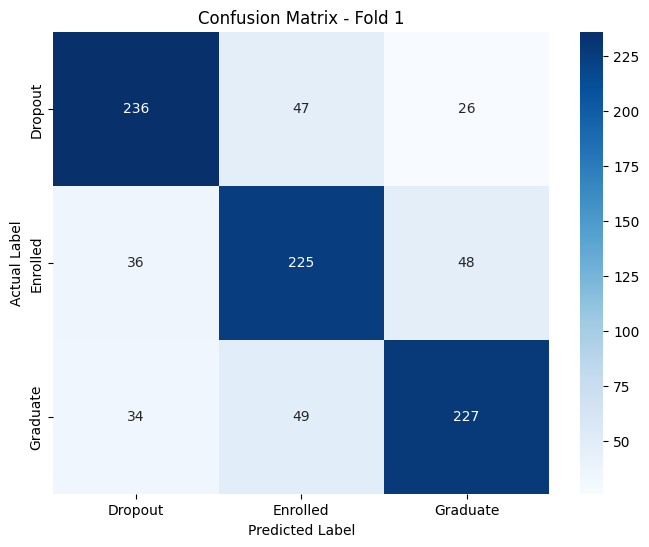


Detailed Classification Report (Fold 1):
              precision    recall  f1-score   support

     Dropout       0.77      0.76      0.77       309
    Enrolled       0.70      0.73      0.71       309
    Graduate       0.75      0.73      0.74       310

    accuracy                           0.74       928
   macro avg       0.74      0.74      0.74       928
weighted avg       0.74      0.74      0.74       928

------------------------------------------------------------
Mean Accuracy across 5 folds: 0.7432 (+/- 0.0120)


In [33]:
from sklearn.tree import DecisionTreeClassifier

dtl_model = DecisionTreeClassifier()

kFold_Validating(dtl_model, X_final, y_final, folds=5, showfold=1)

### SELF_MADE

Tree berjalan dengan cukup lama, sehingga min_samples_split dan max_depth terpaksa dibatasi agar mempercepat pelatihan di ujung deadline ini. Performa tree menjadi menurun signifikan


REPORT FOR FOLD 1


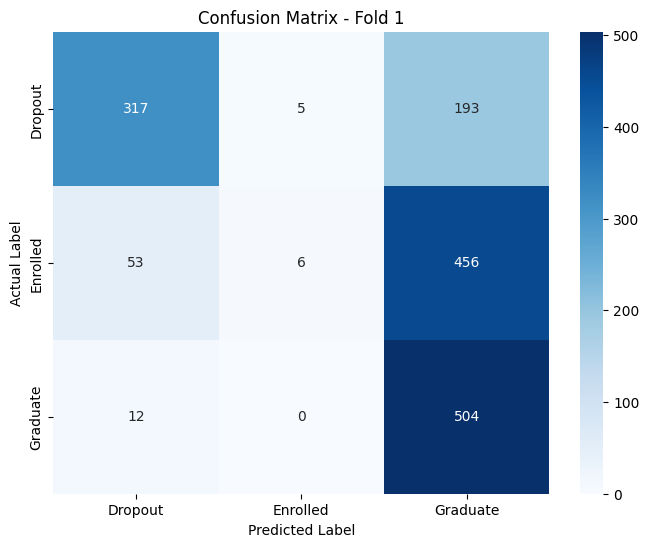


Detailed Classification Report (Fold 1):
              precision    recall  f1-score   support

     Dropout       0.83      0.62      0.71       515
    Enrolled       0.55      0.01      0.02       515
    Graduate       0.44      0.98      0.60       516

    accuracy                           0.53      1546
   macro avg       0.60      0.53      0.44      1546
weighted avg       0.60      0.53      0.44      1546

------------------------------------------------------------
Mean Accuracy across 3 folds: 0.5427 (+/- 0.0059)


In [34]:
from models.DTL import DecisionTreeLearning

my_dtl_model = DecisionTreeLearning(min_samples_split=50, max_depth=15)
kFold_Validating(my_dtl_model, X_final, y_final, folds=3, showfold=1)

## B. Logistic Regression

#### SKLEARN


REPORT FOR FOLD 1


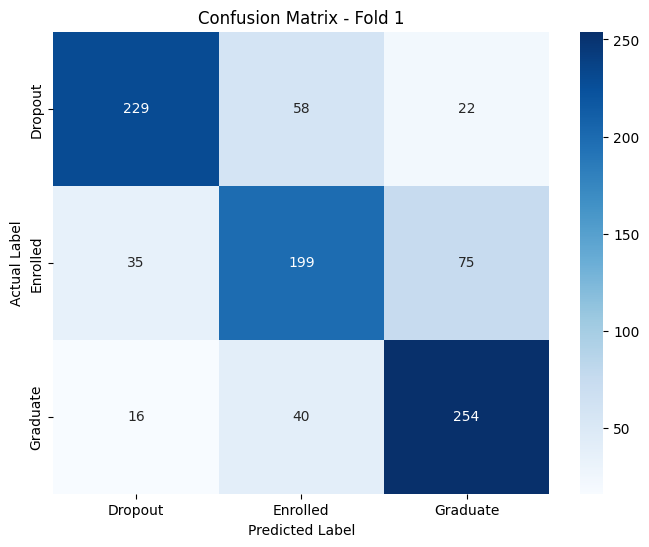


Detailed Classification Report (Fold 1):
              precision    recall  f1-score   support

     Dropout       0.82      0.74      0.78       309
    Enrolled       0.67      0.64      0.66       309
    Graduate       0.72      0.82      0.77       310

    accuracy                           0.73       928
   macro avg       0.74      0.73      0.73       928
weighted avg       0.74      0.73      0.73       928

------------------------------------------------------------
Mean Accuracy across 5 folds: 0.7333 (+/- 0.0140)


In [35]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

kFold_Validating(lr_model, X_final, y_final, folds=5, showfold=1)

#### SELF-MADE


REPORT FOR FOLD 1


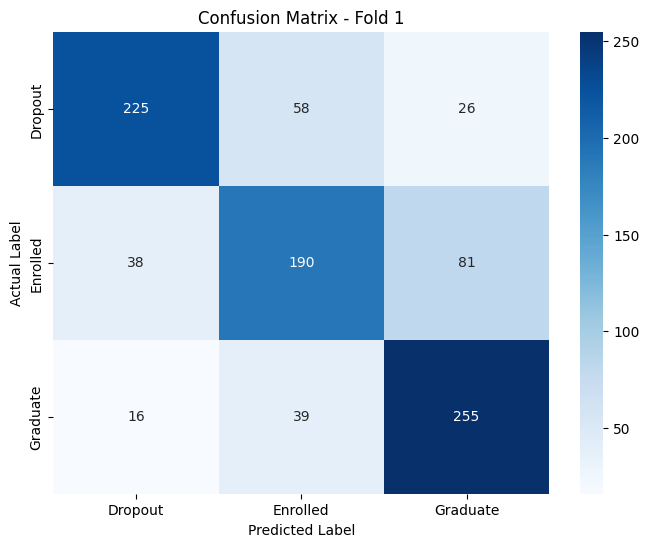


Detailed Classification Report (Fold 1):
              precision    recall  f1-score   support

     Dropout       0.81      0.73      0.77       309
    Enrolled       0.66      0.61      0.64       309
    Graduate       0.70      0.82      0.76       310

    accuracy                           0.72       928
   macro avg       0.72      0.72      0.72       928
weighted avg       0.72      0.72      0.72       928

------------------------------------------------------------
Mean Accuracy across 5 folds: 0.7232 (+/- 0.0118)


In [36]:
from models.LogisticRegression import LogisticRegression
my_lr_model = LogisticRegression()

kFold_Validating(my_lr_model, X_final, y_final, folds=5, showfold=1)

## C. SVM

#### SKLEARN


REPORT FOR FOLD 1


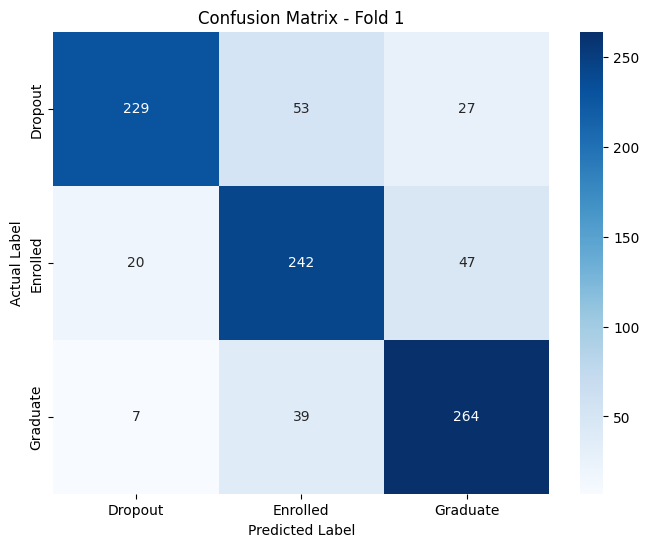


Detailed Classification Report (Fold 1):
              precision    recall  f1-score   support

     Dropout       0.89      0.74      0.81       309
    Enrolled       0.72      0.78      0.75       309
    Graduate       0.78      0.85      0.81       310

    accuracy                           0.79       928
   macro avg       0.80      0.79      0.79       928
weighted avg       0.80      0.79      0.79       928

------------------------------------------------------------
Mean Accuracy across 5 folds: 0.7993 (+/- 0.0201)


In [37]:
from sklearn.svm import SVC

svm_model = SVC()
kFold_Validating(svm_model, X_final, y_final, folds = 5, showfold=1)

#### SELF-MADE


REPORT FOR FOLD 1


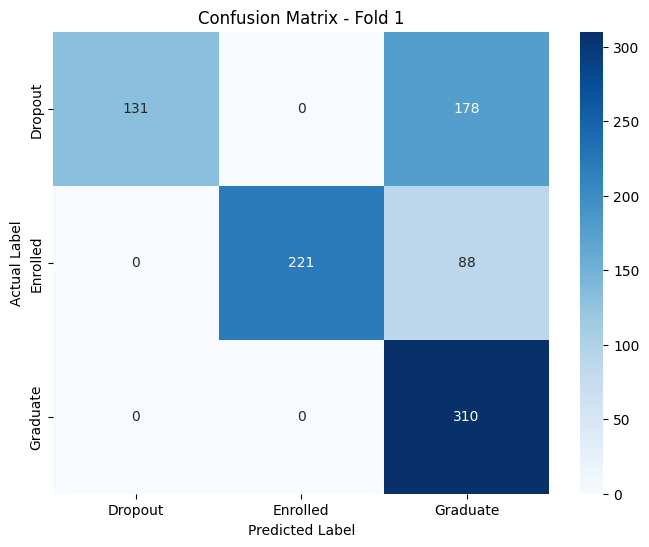


Detailed Classification Report (Fold 1):
              precision    recall  f1-score   support

     Dropout       1.00      0.42      0.60       309
    Enrolled       1.00      0.72      0.83       309
    Graduate       0.54      1.00      0.70       310

    accuracy                           0.71       928
   macro avg       0.85      0.71      0.71       928
weighted avg       0.85      0.71      0.71       928

------------------------------------------------------------
Mean Accuracy across 5 folds: 0.7413 (+/- 0.0159)


In [38]:
from models.SVM import MulticlassSVM

my_svm_model = MulticlassSVM(kernel = 'rbf', max_iter=200)

kFold_Validating(my_svm_model, X_final, y_final, folds = 5, showfold=1)

Sedang melatih model demo untuk visualisasi...
Membuat animasi dari 62 frame...
Sukses! Video tersimpan di: svm_bonus.gif
Visualisasi Training Selesai:


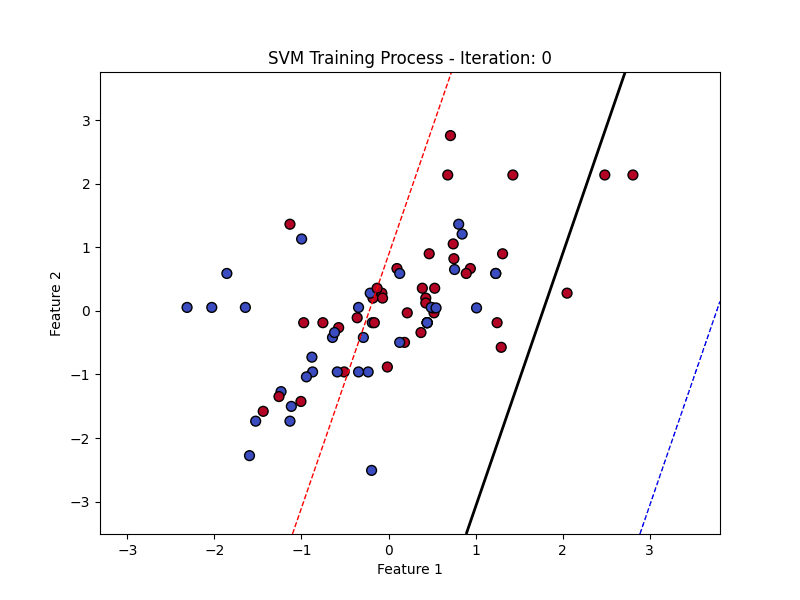

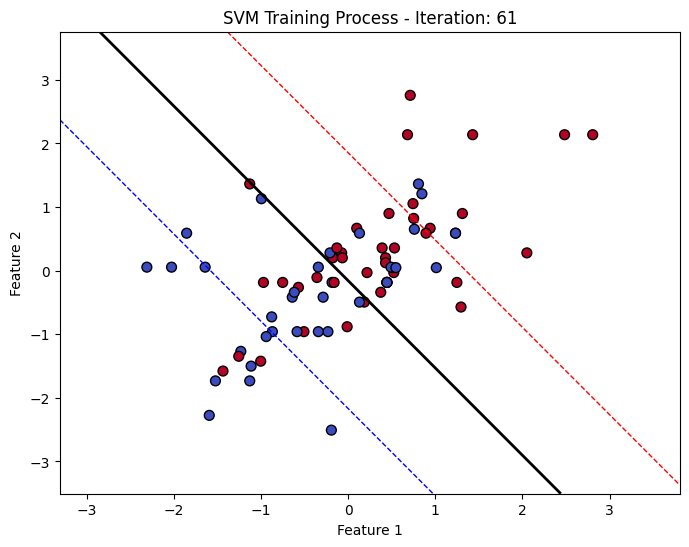

In [49]:
from models.SVM import BinarySVM  
from IPython.display import Image
from sklearn.preprocessing import StandardScaler

# Data Demo (Hanya 2 Fitur & 2 Kelas) 
# Kita ambil sampel agar visualisasi tidak terlalu padat
df_demo = df_train.sample(n=100, random_state=42).copy()

# Filter hanya ambil kelas Dropout (0) dan Graduate (2) untuk visualisasi Binary yang jelas, buang kelas 'Enrolled' (1) sementara untuk demo ini
df_demo = df_demo[df_demo['Target_Encoded'] != 1]

cols_demo = ['Admission grade', 'Previous qualification (grade)']
X_demo = df_demo[cols_demo].values
y_demo = df_demo['Target_Encoded'].values

y_demo = np.where(y_demo == 2, 1, -1)

scaler_demo = StandardScaler()
X_demo_scaled = scaler_demo.fit_transform(X_demo)

print("Sedang melatih model demo untuk visualisasi...")
svm_bonus = BinarySVM(C=1.0, kernel='linear', max_iter=100) 
svm_bonus.fit(X_demo_scaled, y_demo)

output_file = 'svm_bonus.gif'
svm_bonus.generate_training_gif(X_demo_scaled, y_demo, output_path=output_file, fps=5)

print("Visualisasi Training Selesai:")
Image(filename=output_file)

## D. Improvements (Optional)

- Visualize the model evaluation result

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- Explore the hyperparameters of your models

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called hyperparameter tuning. (Hint: Grid search, random search, bayesian optimization)

- Cross-validation

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more robust and reliable evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [40]:
# TODO :
# 1. Hyperparameter Tuning
# 2. Cross-Validation
# 3. Voting Classifier

In [41]:
from sklearn.svm import LinearSVC

class RFESmoteRunner:
    def __init__(self, n_features_to_select=40):
        self.n_features = n_features_to_select
        self.selector = RFE(estimator=LinearSVC(dual=False, max_iter=2000, class_weight='balanced'), 
                            n_features_to_select=n_features_to_select,
                            step=2) 
        self.smote = BorderlineSMOTE(random_state=42, k_neighbors=3)
    
    def fit_resample(self, X, y):
        # 1. Select Best Features
        print(f"   Running RFE (Selecting Top {self.n_features})...", end="")
        X_sel = self.selector.fit_transform(X, y)
        print(" Done.")
        
        # 2. SMOTE
        X_res, y_res = self.smote.fit_resample(X_sel, y)
        return X_res, y_res
    
    def transform(self, X):
        return self.selector.transform(X)

#### Menggunakan Pipeline preprocessing yang sudah ditulis di atas untuk penerapan ke data testing

In [42]:
scaler = StandardScaler()
target_cats = ['Course', 'Application mode', "Mother's occupation", "Father's occupation"]

cardinality_rules = {}

for col in target_cats:
    top_cats = get_top_categories(df_train, col, top_k=30)
    cardinality_rules[col] = top_cats 
    
    df_train[col] = apply_cardinality_reduction(df_train, col, top_cats)

for col in target_cats:
    df_test[col] = apply_cardinality_reduction(df_test, col, cardinality_rules[col])

X_train_clean, y_train_final, scaler_fitted = preprocess_pipeline(
    df_train, 
    scaler=None, 
    is_training=True
)

# Testing Data (Pakai scaler dari training)
X_test_clean, _, _ = preprocess_pipeline(
    df_test, 
    scaler=scaler_fitted, 
    is_training=False
)

print(f"Dimensi Train Bersih: {X_train_clean.shape}")
print(f"Dimensi Test Bersih : {X_test_clean.shape}")

Dimensi Train Bersih: (4638, 202)
Dimensi Test Bersih : (1328, 202)


#### PCA (pemilihan fitur tidak lagi pakai PCA)

In [43]:

# X_train_final, pca_fitted = apply_pca(
#     X_train_clean, 
#     n_components=0.99, 
#     is_training=True
# )

# X_test_final = apply_pca(
#     X_test_clean, 
#     pca_model=pca_fitted, 
#     is_training=False
# )

# print(f"Dimensi Train PCA: {X_train_pca.shape}")
# print(f"Dimensi Test PCA : {X_test_pca.shape}")

#### Pemilihan fitur menggunakan RFECV

In [44]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

print("Sedang mencari jumlah fitur optimal...")

# Tentukan Estimator untuk memilih fitur
# Kita pakai LinearSVC
selector = RFECV(
    estimator=LinearSVC(dual=False, max_iter=2000, class_weight='balanced'),
    step=1,    
    cv=StratifiedKFold(5), 
    scoring='f1_macro',
    n_jobs=-1
)

selector.fit(X_train_clean, y_train_final)

print(f"Jumlah fitur optimal: {selector.n_features_}")

X_train_selected = selector.transform(X_train_clean)
X_test_selected = selector.transform(X_test_clean)

selected_features_mask = selector.support_
print("Fitur yang dipilih:", X_train_clean.columns[selected_features_mask])

Sedang mencari jumlah fitur optimal...
Jumlah fitur optimal: 170
Fitur yang dipilih: Index(['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (evaluations)', 'Approval_Rate_S1',
       'Approval_Rate_S2', 'Approval_Rate_Mean',
       ...
       'Curricular units 2nd sem (without evaluations)_5',
       'Curricular units 2nd sem (without evaluations)_6',
       'Curricular units 2nd sem (without evaluations)_7',
       'Curricular units 2nd sem (without evaluations)_8',
       'Financial_Vulnerability_0', 'Financial_Vulnerability_1',
       'Age_group_encoded_0', 'Age_group_encoded_1', 'Age_group_encoded_2',
       'Age_group_encoded_3'],
      dtype='object', length=170)


#### Hyperparameter Tuning

In [45]:
# # %pip install optuna
# import optuna
# from models.SVM import MulticlassSVM
# from sklearn.metrics import f1_score
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     c_param = trial.suggest_float('C', 0.1, 100.0, log=True)
    
#     gamma_param = trial.suggest_categorical('gamma', [0.001, 0.01, 0.005, 0.1, 1.0])
#     kernel_name = trial.suggest_categorical('kernel', ['rbf', 'polynomial'])

#     skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#     scores = []

#     X = X_train_selected.values if hasattr(X_train_selected, 'values') else X_train_selected
#     y = y_train_final.values if hasattr(y_train_final, 'values') else y_train_final

#     for train_index, val_index in skf.split(X, y):
#         X_tr, X_val = X[train_index], X[val_index]
#         y_tr, y_val = y[train_index], y[val_index]

#         model = MulticlassSVM(
#             C=c_param, 
#             kernel=kernel_name,  
#             kernel_param=gamma_param, 
#             max_iter=2000
#         )

#         # Fit & Predict
#         model.fit(X_tr, y_tr)
#         preds = model.predict(X_val)

#         # Hitung Score (Macro F1)
#         score = f1_score(y_val, preds, average='macro')
#         scores.append(score)

#     # Kembalikan rata-rata skor dari semua fold
#     return np.mean(scores)

# # Jalankan optimasi
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=8) 

# print("Best Params:", study.best_params)

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

#### Pelatihan model final (menggunakan dataset train keseluruhan) dan prediksi test untuk submisi

In [46]:
from models.DTL import DecisionTreeLearning
from models.LogisticRegression import LogisticRegression
from models.SVM import MulticlassSVM

# final_model = LogisticRegression()
final_C = 10.0
final_G = 0.01
final_model = MulticlassSVM(C=final_C, kernel='rbf', kernel_param=final_G, max_iter=2000)
# final_model = DecisionTreeLearning(min_samples_split = 10, max_depth = 100)

final_model.fit(X_train_selected, y_train_final)
y_pred = final_model.predict(X_test_selected)

submission = pd.DataFrame({'Student_ID' : df_test['Student_ID'], 'Target' : y_pred})

mapping = {0 : 'Dropout', 1 : 'Enrolled', 2 : 'Graduate'}

submission['Target'] = submission['Target'].map(mapping)

In [47]:
submission.head()

,Student_ID,Target
0,2701,Dropout
1,1142,Graduate
2,3538,Dropout
3,3000,Dropout
4,476,Graduate


In [48]:
submission.to_csv('submission/submission13.csv', index = False)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

##### **Does my model perform better in predicting one class than the other? If so, why is that?**

Ya, terjadi ketimpangan. Di semua model (kecuali Decision Tree yang cenderung seimbang), kelas "Graduate" dan "Dropout" memiliki F1-score lebih tinggi, sedangkan "Enrolled" paling rendah.

Hal ini dikarenakan : Ketidakseimbangan data, meskipun SMOTE sudah digunakan untuk mengatasi ini, data asli lebih banyak didominasi oleh kelas Graduate. Model cenderung bias ke kelas mayoritas.
Selain itu, jika kelas Enrolled sangat sedikit dan tersebar, SMOTE mungkin membuat noise yang malah membingungkan model.

#####  **To each models I have tried, which performs the best and what could be the reason?**

SVM (terutama dengan kernel RBF) bekerja paling baik karena cara dia menarik garis batas antar kategori (Dropout, Enrolled, Graduate).

1. SVM (RBF) bisa membuat garis batas yang melengkung dan fleksibel. Ini memungkinkannya mengelilingi atau memisahkan kelompok data yang posisinya rumit sekalipun. Berbeda dengan Logistic Regression yang hanya bisa memisahkan data dengan garis lurus.
Padahal, data mahasiswa itu rumit (misal: ada yang IPK rendah tapi tidak DO, ada yang IPK tinggi tapi DO karena biaya). Data seperti ini biasanya tercampur dan tidak bisa dipisahkan garis lurus.

2. SVM peduli pada data-data di perbatasan ( Support Vectors).
SVM berusaha mencari margin terlebar yang memisahkan antar kelas.
Dengan memaksimalkan margin ini, model menjadi lebih robust terhadap data baru. Ia tidak terlalu mepet dalam mengambil keputusan, sehingga error di data Test lebih kecil dibanding DTL.

3. SVM sangat efektif di ruang berdimensi tinggi. LogRes bisa mengalami kesulitan konvergensi jika fitur terlalu banyak relatif terhadap jumlah sampel, dan DTL bisa membuat pohon yang terlalu dalam dan rumit. SVM tetap stabil karena ia hanya bergantung pada dot product antar data (via Kernel).

#####  **Is it better for me to impute or drop the missing data? Why?**

Meskipun pada percobaan di atas tidak ada data yang memiliki missing value, tetapi Imputation menurut kami akan selalu lebih baik.

1. Membuang row berarti membuang informasi. Jika dataset kecil, membuang 10-20% data bisa merusak kemampuan model belajar pola global, dan model cenderung tidak menangkap pola dari data.

2. Saat model dipakai di dunia nyata, akan ada user yang datanya tidak lengkap. Model harus bisa menangani itu (lewat imputasi rata-rata/median/modus) daripada menolak memprediksi.

3. Data yang hilang kemungkinan besar bukan outlier dan dapat terprediksi dengan baik oleh imputer. Contoh: Nilai mahasiswa yang kosong, dengan mempertimbangkan distribusi normal, kemungkinan nilainya tidak jauh dari rata-rata. Jika dibuang, satu row yang memiliki informasi lain disayangkan terbuang.

##### **Does feature scaling help improve my model performance?**

1. **SVM** 

SVM bekerja dengan menghitung Jarak Euclidean antar titik data (untuk mencari Support Vectors). Jika ada fitur Gaji (skala jutaan) dan IPK (skala 0-4), jarak akan didominasi total oleh Gaji. IPK dianggap tidak penting, padahal hanya masalah rentang data. Scaling (StandardScaler/MinMaxScaler) membuat semua fitur "setara".

2. **Logistic Regression**

LogReg menggunakan Gradient Descent untuk mencari bobot optimal. Jika skala data timpang, proses konvergensi (mencari titik minimum) akan sangat lambat atau gagal mencapai hasil optimal.

3. **Decision Tree**

Untuk Decision Tree, scaling TIDAK berpengaruh. DTL bekerja dengan aturan splitting (misal: if Gaji > 1000), jadi skala angka tidak mengubah struktur pohon.